In [88]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/temp_density_tree.model.sav", "rb"))
features = (
    pd.read_csv("data/density_train.csv", sep=";", decimal=",")
    .drop(["T"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Density <= 1.04
|   |--- Density <= 1.03
|   |   |--- value: [70.00]
|   |--- Density >  1.03
|   |   |--- Density <= 1.04
|   |   |   |--- value: [65.00]
|   |   |--- Density >  1.04
|   |   |   |--- value: [60.00]
|--- Density >  1.04
|   |--- Density <= 1.07
|   |   |--- TiO2 <= 0.03
|   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |--- Density <= 1.05
|   |   |   |   |   |--- Density <= 1.05
|   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |--- Density >  1.05
|   |   |   |   |   |   |--- value: [42.50]
|   |   |   |   |--- Density >  1.05
|   |   |   |   |   |--- Density <= 1.06
|   |   |   |   |   |   |--- value: [35.00]
|   |   |   |   |   |--- Density >  1.06
|   |   |   |   |   |   |--- value: [22.50]
|   |   |   |--- Al2O3 >  0.03
|   |   |   |   |--- Density <= 1.06
|   |   |   |   |   |--- Density <= 1.05
|   |   |   |   |   |   |--- value: [70.00]
|   |   |   |   |   |--- Density >  1.05
|   |   |   |   |   |   |--- value: [65.00]
|   |   |   |   |--- Den

In [89]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

27

[if (Density > 1.042) and (Density > 1.069) and (Density <= 1.118) and (Density > 1.083) and (Density > 1.086) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density > 1.053) and (Density > 1.057) -> 22.5,
 if (Density <= 1.042) and (Density > 1.033) and (Density > 1.037) -> 60.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density <= 1.053) and (Density <= 1.046) -> 50.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density <= 1.053) and (Density > 1.046) -> 42.5,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density > 1.053) and (Density <= 1.057) -> 35.0,
 if (Density <= 1.042) and (Density > 1.033) and (Density <= 1.037) -> 65.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) and (Density <= 1.061) and (Density <= 1.055) -> 70.0,
 if (De

In [90]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

27

[if (Density > 1.042) and (Density <= 1.118) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 22.5,
 if (Density <= 1.042) and (Density > 1.033) -> 60.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 50.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 42.5,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 35.0,
 if (Density <= 1.042) and (Density > 1.033) -> 65.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 70.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 65.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 55.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 50.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 > 0.025

In [91]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

15

[if (Density > 1.042) and (Density <= 1.118) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 37.5,
 if (Density <= 1.042) and (Density > 1.033) -> 62.5,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 60.0,
 if (Density > 1.042) and (Density <= 1.069) and (TiO2 > 0.025) -> 65.0,
 if (Density > 1.042) and (Density <= 1.118) -> 37.5,
 if (Density > 1.042) and (Density <= 1.118) and (Al2O3 <= 0.025) -> 22.5,
 if (Density <= 1.042) -> 70.0,
 if (Density > 1.042) and (Density <= 1.179) -> 70.0,
 if (Density > 1.042) and (Density <= 1.179) and (Al2O3 <= 0.15) -> 65.0,
 if (Density > 1.042) and (Density <= 1.179) and (Al2O3 > 0.15) -> 50.0,
 if (Density > 1.042) and (Density <= 1.203) and (Al2O3 <= 0.15) -> 50.0,
 if (Density > 1.042) and (Al2O3 <= 0.15) -> 30.0,
 if (Density > 1.042) and (Density <= 1.182) and (Al2O3 > 0.15) -> 30.0,
 if (Density > 1.042) and (Al2O3 > 0.15) -> 22.5]

In [92]:
density_train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
density_test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

display(density_train.head(3))
display(density_test.head(3))

T  Al2O3  TiO2  Density
0  20    0.0   0.0  1.06250
1  25    0.0   0.0  1.05979
2  35    0.0   0.0  1.05404

T  Al2O3  TiO2  Density
0  30   0.00   0.0  1.05696
1  55   0.00   0.0  1.04158
2  25   0.05   0.0  1.08438

In [93]:
from src.rules import simplify_rules

rules = simplify_rules(density_train, rules)
display(len(rules))
rules

15

[if (Density = 1.08) and (Al2O3 = 0.3) -> 20.0,
 if (Density = 1.055) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 37.5,
 if (Density = 1.037) -> 62.5,
 if (Density = 1.055) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 60.0,
 if (Density = 1.055) and (TiO2 = 0.3) -> 65.0,
 if (Density = 1.08) -> 37.5,
 if (Density = 1.08) and (Al2O3 = 0.0) -> 22.5,
 if (Density = 1.032) -> 70.0,
 if (Density = 1.11) -> 70.0,
 if (Density = 1.11) and (Al2O3 = 0.0) -> 65.0,
 if (Density = 1.11) and (Al2O3 = 0.3) -> 50.0,
 if (Density = 1.122) and (Al2O3 = 0.0) -> 50.0,
 if (Density = 1.219) and (Al2O3 = 0.0) -> 30.0,
 if (Density = 1.112) and (Al2O3 = 0.3) -> 30.0,
 if (Density = 1.219) and (Al2O3 = 0.3) -> 22.5]

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


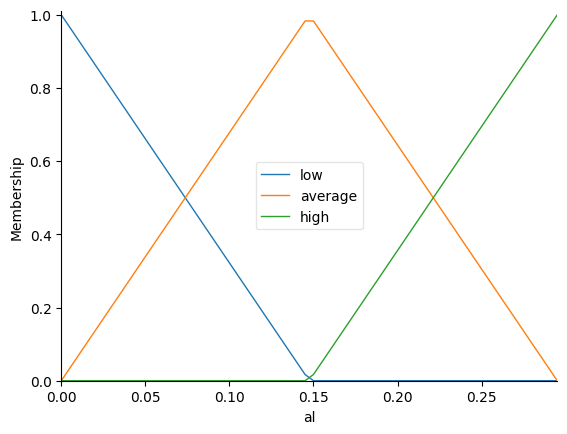

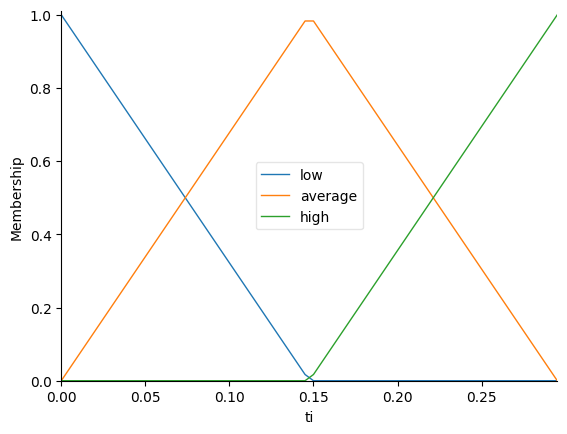

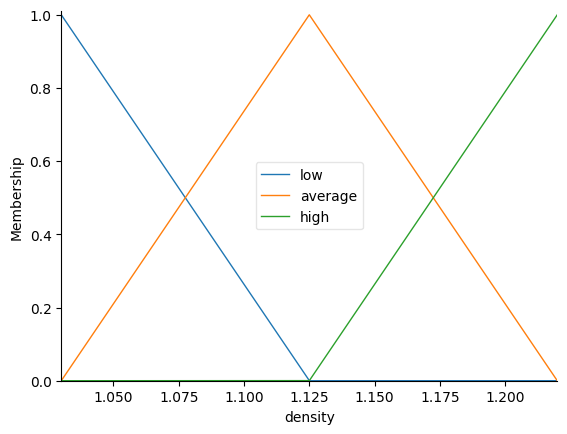

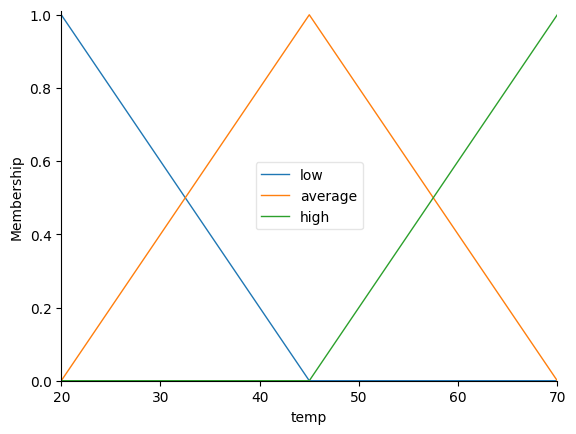

In [107]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
density = ctrl.Antecedent(np.arange(1.03, 1.22, 0.00001), "density")
temp = ctrl.Consequent(density_train["T"].sort_values().unique(), "temp")
# temp = ctrl.Consequent(np.arange(20, 70, 5), "temp")

al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(3, variable_type="quant")
density.view()
temp.automf(3, variable_type="quant")
temp.view()

In [108]:
# from skfuzzy.control.fuzzyvariable import FuzzyVariable
# from skfuzzy.control.rule import Rule as FuzzyRule
# from skfuzzy.control.term import Term
# from typing import List, Tuple

# from functools import reduce
# from operator import and_

# from src.rules import RuleAtom

# def gfa(
#     fuzzy_variable: FuzzyVariable, value: float
# ) -> Tuple[Term, float]:
#     values = {}
#     for term in fuzzy_variable.terms:
#         mval = np.interp(value, fuzzy_variable.universe, fuzzy_variable[term].mf)
#         values[term] = mval
#     best_value = sorted(values.items(), key=lambda x: x[1], reverse=True)[0]
#     return (fuzzy_variable[best_value[0]], best_value[1])


# def dsfr(
#     rules: List[Tuple[List[RuleAtom], Term, float]]
# ) -> List[Tuple[List[RuleAtom], Term, float]]:
#     same_rules: List[int] = []
#     for rule1_index, rule1 in enumerate(rules):
#         for rule2_index, rule2 in enumerate(rules):
#             if rule1_index >= rule2_index:
#                 continue
#             # Remove the same rules
#             if str(rule1[0]) == str(rule2[0]) and str(rule1[1]) == str(rule2[1]):
#                 same_rules.append(rule1_index)
#                 break
#             # If antecedents is equals, but consequents is not equals then
#             # Remove rule with the higher antecedent weight
#             if str(rule1[0]) == str(rule2[0]) and str(rule1[2]) <= str(rule2[2]):
#                 same_rules.append(rule2_index)
#                 break
#             if str(rule1[0]) == str(rule2[0]) and str(rule1[2]) > str(rule2[2]):
#                 same_rules.append(rule1_index)
#                 break
#     return [rule for index, rule in enumerate(rules) if index not in same_rules]

# display(rules)

# fuzzy_variables = {"Al2O3": al, "TiO2": ti, "Density": density, "consequent": temp}
# fuzzy_rules: List[Tuple[List[RuleAtom], Term, float]] = []
# for rule in rules:
#     tmp_rule = []
#     for atom in rule.get_antecedent():
#         if fuzzy_variables.get(atom.get_varaible(), None) is None:
#             continue
#         variable = gfa(fuzzy_variables[atom.get_varaible()], atom.get_value())
#         tmp_rule.append(variable)
#         # if tmp_rule.get(variable[0].parent, None) is None:
#         #     tmp_rule[variable[0].parent] = variable
#         # else:
#         #     if tmp_rule[variable[0].parent][1] > variable[1]:
#         #         tmp_rule[variable[0].parent] = variable
#     consequent = gfa(
#         fuzzy_variables["consequent"], rule.get_consequent()
#     )[0]
#     fuzzy_rules.append(
#         (
#             # FuzzyRule(reduce(and_, [atom[0] for atom in antecedent]), consequent),
#             [atom[0] for atom in tmp_rule],
#             consequent,
#             sum([atom[1] for atom in tmp_rule]),
#         )
#     )
# fuzzy_rules = dsfr(fuzzy_rules)
# frules = [FuzzyRule(reduce(and_, item[0]), item[1]) for item in fuzzy_rules]
# display(len(frules))
# display(frules)

# # fuzzy_cntrl = ctrl.ControlSystem(frules)

# # sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

In [109]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "Density": density, "consequent": temp}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

9

[IF density[average] AND al[high] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[low] AND ti[low]) AND al[low] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[low] AND ti[low]) AND al[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] AND ti[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[average] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[average] AND al[low] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[high] AND al[low] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[high] AND al[high] THEN temp[low]
 	AND aggregation f

 Antecedents 
Antecedent: density                 = 1.0569013636039
  - low                             : 0.716812846952748
  - average                         : 0.283187153047252
  - high                            : 0.0
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF density[average] AND al[high] THEN temp[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - density[average]                                       : 0.283187153047252
  - al[high]                                               : 0.0
                             density[average] AND al[high] = 0.0
  Activation (THEN-clause):
                                           

np.float64(47.897027582440735)

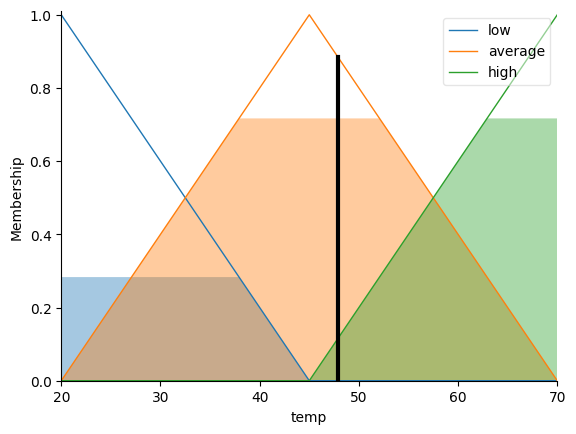

In [110]:
# sim.input["al"] = 0.0
# sim.input["ti"] = 0.0
# sim.input["density"] = 1.05979
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.input["density"] = 1.0569013636039
sim.compute()
sim.print_state()
display(sim.output["temp"])
temp.view(sim=sim)

In [111]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.input["density"] = row["Density"]
    sim.compute()
    return sim.output["temp"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))


result_train = density_train.copy()
result_train["Real"] = result_train["T"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_train.head(15)

T  Al2O3  TiO2  Density  Real   Inferred       RMSE
0   20   0.00   0.0  1.06250    20  47.327945  27.327945
1   25   0.00   0.0  1.05979    25  47.611470  22.611470
2   35   0.00   0.0  1.05404    35  48.165031  13.165031
3   40   0.00   0.0  1.05103    40  48.432971   8.432971
4   45   0.00   0.0  1.04794    45  48.651848   3.651848
5   50   0.00   0.0  1.04477    50  48.779612   1.220388
6   60   0.00   0.0  1.03826    60  49.007364  10.992636
7   65   0.00   0.0  1.03484    65  49.109219  15.890781
8   70   0.00   0.0  1.03182    70  49.189167  20.810833
9   20   0.05   0.0  1.08755    20  43.235730  23.235730
10  45   0.05   0.0  1.07105    45  46.159681   1.159681
11  50   0.05   0.0  1.06760    50  46.745501   3.254499
12  55   0.05   0.0  1.06409    55  47.153699   7.846301
13  65   0.05   0.0  1.05691    65  47.983498  17.016502
14  70   0.05   0.0  1.05291    70  48.428651  21.571349

In [112]:
result_test = density_test.copy()
result_test["Real"] = result_test["T"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
# result_test["RMSE"] = result_test["RMSE"].apply(lambda x: "{:,.4f}".format(x))
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2  Density  Real   Inferred    RMSE
0   30   0.00  0.00  1.05696    30  47.891388  17.891
1   55   0.00  0.00  1.04158    55  48.896868   6.103
2   25   0.05  0.00  1.08438    25  43.763385  18.763
3   30   0.05  0.00  1.08112    30  44.343497  14.343
4   35   0.05  0.00  1.07781    35  44.942768   9.943
5   40   0.05  0.00  1.07446    40  45.551433   5.551
6   60   0.05  0.00  1.06053    60  47.561265  12.439
7   35   0.30  0.00  1.17459    35  41.725073   6.725
8   65   0.30  0.00  1.14812    65  41.027110  23.973
9   45   0.00  0.05  1.07424    45  45.590985   0.591
10  50   0.00  0.05  1.07075    50  46.212753   3.787
11  55   0.00  0.05  1.06721    55  46.792589   8.207
12  20   0.00  0.30  1.22417    20  28.333333   8.333
13  30   0.00  0.30  1.21310    30  32.052213   2.052
14  40   0.00  0.30  1.20265    40  35.887897   4.112
15  60   0.00  0.30  1.18265    60  40.494729  19.505
16  70   0.00  0.30  1.17261    70  42.007217  27.993

In [113]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 15.400435161512734,
 'RMSE_test': 13.625552728224925,
 'RMAE_test': 3.345881099161754,
 'R2_test': 0.12969191263186874}